 <h1 style="text-align:center;">Major Project - Covid 19</h1>
 <p style ="text-align:right;"> <b>by</b>&nbsp;&emsp;:&emsp;Abhijeet Sahdev</p>

In [1365]:
import pandas as pd
pd.options.mode.chained_assignment = None  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
from datetime import date

from scipy import stats
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

outlier_circle = dict(markerfacecolor='#081d58', marker='.')
meanlineprops = dict(linestyle='--', linewidth=2, color='#7fcdbb')
medianprops = dict(linestyle='dotted', linewidth=2, color='#1d91c0')
boxprops=dict(facecolor='#ffffd9', color='#ffffd9')
sns.set_palette("YlGnBu")
sns.set(rc={'figure.figsize':(12,9)})

## Import Dataset

In [1366]:
data = pd.read_csv("/Users/jxxt/verzeo/MajorProject-2/owid-covid-data.csv")

In [1367]:
data.shape

(35927, 36)

The given csv file has 35,927 rows and 36 columns

In [1368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35927 entries, 0 to 35926
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         35863 non-null  object 
 1   continent                        35639 non-null  object 
 2   location                         35927 non-null  object 
 3   date                             35927 non-null  object 
 4   total_cases                      35582 non-null  float64
 5   new_cases                        35582 non-null  float64
 6   total_deaths                     35582 non-null  float64
 7   new_deaths                       35582 non-null  float64
 8   total_cases_per_million          35518 non-null  float64
 9   new_cases_per_million            35518 non-null  float64
 10  total_deaths_per_million         35518 non-null  float64
 11  new_deaths_per_million           35518 non-null  float64
 12  new_tests         

In [1369]:
i = 0;
for col in data:
    print("Index :",i)
    print("Column : "+col+", unique values :",data[col].nunique())
    i = i + 1 

Index : 0
Column : iso_code, unique values : 211
Index : 1
Column : continent, unique values : 6
Index : 2
Column : location, unique values : 212
Index : 3
Column : date, unique values : 224
Index : 4
Column : total_cases, unique values : 12135
Index : 5
Column : new_cases, unique values : 3210
Index : 6
Column : total_deaths, unique values : 4170
Index : 7
Column : new_deaths, unique values : 890
Index : 8
Column : total_cases_per_million, unique values : 21938
Index : 9
Column : new_cases_per_million, unique values : 12145
Index : 10
Column : total_deaths_per_million, unique values : 10743
Index : 11
Column : new_deaths_per_million, unique values : 2613
Index : 12
Column : new_tests, unique values : 7227
Index : 13
Column : total_tests, unique values : 11225
Index : 14
Column : total_tests_per_thousand, unique values : 9321
Index : 15
Column : new_tests_per_thousand, unique values : 2313
Index : 16
Column : new_tests_smoothed, unique values : 8042
Index : 17
Column : new_tests_smooth

In [1370]:
data.location.nunique()

212

### This dataset comprises of 212 countries but we're concerned about India alone. 

In [1371]:
required_df = data[data['location'] == 'India']

In [1372]:
required_df.shape

(223, 36)

In [1373]:
required_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 15397 to 15619
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         223 non-null    object 
 1   continent                        223 non-null    object 
 2   location                         223 non-null    object 
 3   date                             223 non-null    object 
 4   total_cases                      223 non-null    float64
 5   new_cases                        223 non-null    float64
 6   total_deaths                     223 non-null    float64
 7   new_deaths                       223 non-null    float64
 8   total_cases_per_million          223 non-null    float64
 9   new_cases_per_million            223 non-null    float64
 10  total_deaths_per_million         223 non-null    float64
 11  new_deaths_per_million           223 non-null    float64
 12  new_tests       

### Dealing with null values

In [1374]:
# removing rows where cases where 0
required_df = required_df[required_df['total_cases'] != 0]

In [1375]:
# list of all the columns containing null values
nans = required_df.columns[required_df.isna().any()].tolist()

for column in nans:
    if(required_df[column].dtype == 'float64'):
        # replaces nans with mean for float objects
        required_df[column].fillna((required_df[column].mean()),inplace = True)
    else:
        # replaces nans with mode for object type
        required_df[column].fillna((required_df[column].mode()[0]), inplace = True)

Replacing the null values with means values of respective columns for float dtypes and mode for object datatype

In [1376]:
required_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 15427 to 15619
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         193 non-null    object 
 1   continent                        193 non-null    object 
 2   location                         193 non-null    object 
 3   date                             193 non-null    object 
 4   total_cases                      193 non-null    float64
 5   new_cases                        193 non-null    float64
 6   total_deaths                     193 non-null    float64
 7   new_deaths                       193 non-null    float64
 8   total_cases_per_million          193 non-null    float64
 9   new_cases_per_million            193 non-null    float64
 10  total_deaths_per_million         193 non-null    float64
 11  new_deaths_per_million           193 non-null    float64
 12  new_tests       

<p> Now, we do not have any missing values. </p>


## Dropping unnecessary columns

In [1377]:
col_drop = []
for col in required_df:
    if(required_df[col].nunique() == 1 and (col != 'date' ) and (col != 'life_expectancy') and (col != 'gdp_per_capita')):
        col_drop.append(col)
col_drop   

['iso_code',
 'continent',
 'location',
 'tests_units',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand']

In [1378]:
required_df = required_df.drop(columns = col_drop)
required_df.shape

(193, 20)

In [1379]:
required_df.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,gdp_per_capita,life_expectancy
15427,2020-01-30,1.0,1.0,0.0,0.0,0.001,0.001,0.0,0.0,183824.586466,6.345752e+06,4.598374,0.133226,158027.729167,0.114507,18.032347,0.066611,10.19,6426.674,69.66
15428,2020-01-31,1.0,0.0,0.0,0.0,0.001,0.000,0.0,0.0,183824.586466,6.345752e+06,4.598374,0.133226,158027.729167,0.114507,18.032347,0.066611,10.19,6426.674,69.66
15429,2020-02-01,1.0,0.0,0.0,0.0,0.001,0.000,0.0,0.0,183824.586466,6.345752e+06,4.598374,0.133226,158027.729167,0.114507,18.032347,0.066611,10.19,6426.674,69.66
15430,2020-02-02,2.0,1.0,0.0,0.0,0.001,0.001,0.0,0.0,183824.586466,6.345752e+06,4.598374,0.133226,158027.729167,0.114507,18.032347,0.066611,10.19,6426.674,69.66
15431,2020-02-03,2.0,0.0,0.0,0.0,0.001,0.000,0.0,0.0,183824.586466,6.345752e+06,4.598374,0.133226,158027.729167,0.114507,18.032347,0.066611,10.19,6426.674,69.66


## Univariate Analysis

<p> <b>Number of days</b>  can be implied from <b> Count </b> in the histograms </p>

Consider Total Cases,
		 Minimum Value : 1.0
		 Maximum Value : 2215074.0
		 Mean          : 337354.61
		 Median        : 49391.0


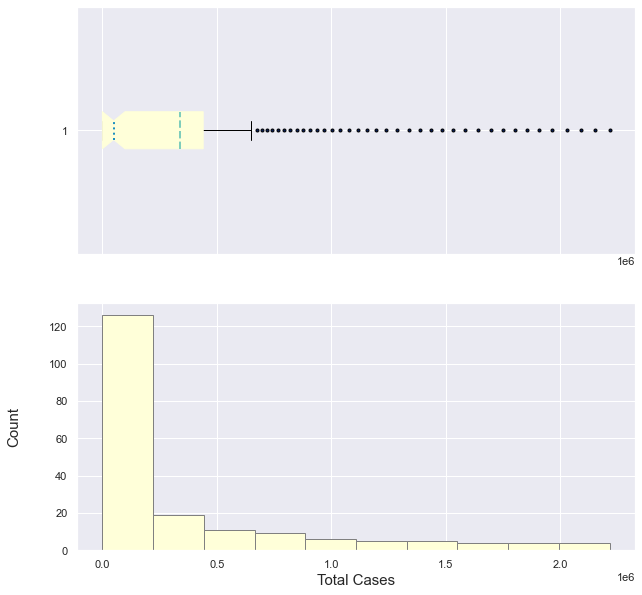

In [1380]:
total_cases = required_df["total_cases"];
x_label = "Total Cases"
y_label = "Count"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(total_cases,vert = False,notch = True, meanline = True,showmeans = True, flierprops=outlier_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, boxprops = boxprops, patch_artist = True )
ax2.hist(total_cases,facecolor = '#ffffd9',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)

print("Consider Total Cases,")
print("\t\t Minimum Value :",total_cases.min())
print("\t\t Maximum Value :",total_cases.max())
print("\t\t Mean          :",round(total_cases.mean(),2))
print("\t\t Median        :",total_cases.median())


For a long duration, the cases where <10^6 but once it reached that level it has accelarated as the counts in the subsequent bins are fairly low.

Consider Deaths,
		 Minimum Value : 0.0
		 Maximum Value : 44386.0
		 Mean          : 8391.44
		 Median        : 1694.0


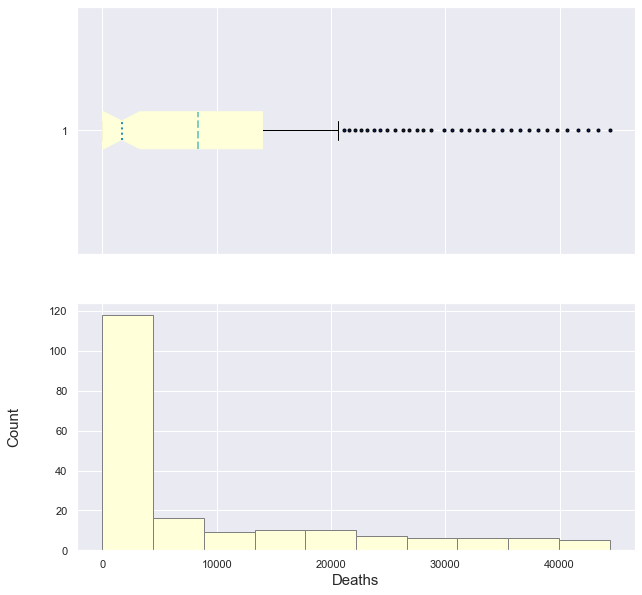

In [1381]:
total_deaths = required_df["total_deaths"];
x_label = "Deaths"
y_label = "Count"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(total_deaths,vert = False,notch = True, meanline = True,showmeans = True, flierprops=outlier_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, boxprops = boxprops, patch_artist = True )
ax2.hist(total_deaths,facecolor = '#ffffd9',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)

print("Consider Deaths,")
print("\t\t Minimum Value :",total_deaths.min())
print("\t\t Maximum Value :",total_deaths.max())
print("\t\t Mean          :",round(total_deaths.mean(),2))
print("\t\t Median        :",total_deaths.median())

As the virus spread, the deaths kept increasing.

Consider new_cases,
		 Minimum Value : 0.0
		 Maximum Value : 64399.0
		 Mean          : 11477.07
		 Median        : 3277.0


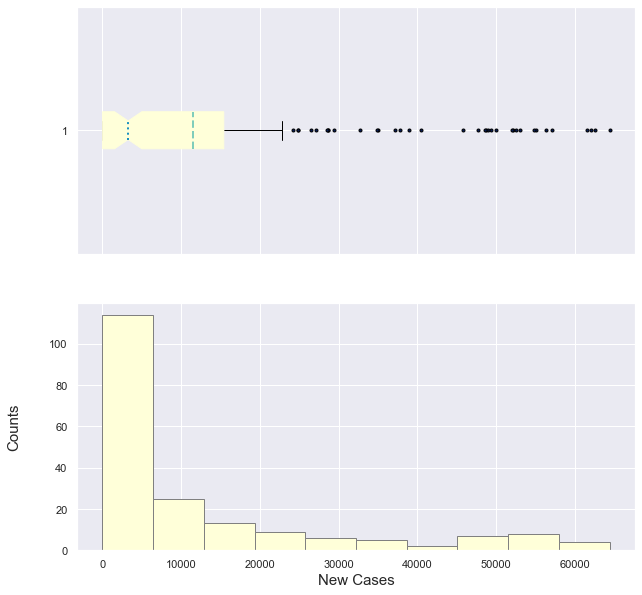

In [1382]:
new_cases = required_df["new_cases"];
x_label = "New Cases"
y_label = "Counts"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(new_cases,vert = False,notch = True, meanline = True,showmeans = True, flierprops=outlier_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, boxprops = boxprops, patch_artist = True )
ax2.hist(new_cases,facecolor = '#ffffd9',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)

print("Consider new_cases,")
print("\t\t Minimum Value :",new_cases.min())
print("\t\t Maximum Value :",new_cases.max())
print("\t\t Mean          :",round(new_cases.mean(),2))
print("\t\t Median        :",new_cases.median())

New cases observed on each day have also accelerated in the similar manner as it did for total cases and deaths. As of 
10th August, 2020 we're now facing over 60K fresh cases of Covid - 19 patients.

Consider new_deaths,
		 Minimum Value : 0.0
		 Maximum Value : 2003.0
		 Mean          : 229.98
		 Median        : 89.0


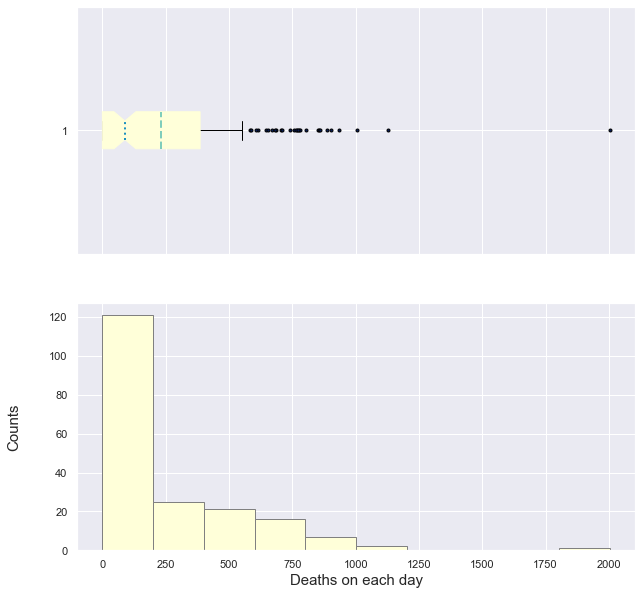

In [1383]:
new_deaths = required_df["new_deaths"];
x_label = "Deaths on each day"
y_label = "Counts"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(new_deaths,vert = False,notch = True, meanline = True,showmeans = True, flierprops=outlier_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, boxprops = boxprops, patch_artist = True )
ax2.hist(new_deaths,facecolor = '#ffffd9',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)

print("Consider new_deaths,")
print("\t\t Minimum Value :",new_deaths.min())
print("\t\t Maximum Value :",new_deaths.max())
print("\t\t Mean          :",round(new_deaths.mean(),2))
print("\t\t Median        :",new_deaths.median())

Despite the rise in new cases each day, the number of new deaths have been at a moderate level.It has rarely gone beyong 2000 deads on day. This backs the fact that the mortality rate of this virus is fairly low. 

Consider New Tests,
		 Minimum Value : 157.0
		 Maximum Value : 719364.0
		 Mean          : 183824.59
		 Median        : 183824.5864661654


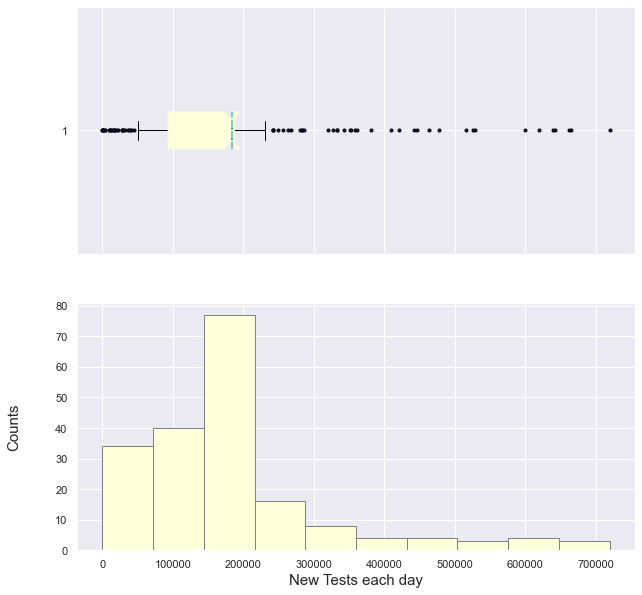

In [1384]:
new_tests = required_df["new_tests"];
x_label = "New Tests each day"
y_label = "Counts"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(new_tests,vert = False,notch = True, meanline = True,showmeans = True, flierprops=outlier_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, boxprops = boxprops, patch_artist = True )
ax2.hist(new_tests,facecolor = '#ffffd9',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)

print("Consider New Tests,")
print("\t\t Minimum Value :",new_tests.min())
print("\t\t Maximum Value :",new_tests.max())
print("\t\t Mean          :",round(new_tests.mean(),2))
print("\t\t Median        :",new_tests.median())

For about 70-78 days, tests conducted were around 1,50,000 to 2,00,000. Then we notice a sudden increase in the tests carried out in the upcoming days. From this we can imply that the testing facilities had surged and more number of citizens could get themselves tested.

Consider total_tests,
		 Minimum Value : 6500.0
		 Maximum Value : 24583558.0
		 Mean          : 6345751.59
		 Median        : 6345751.589928058


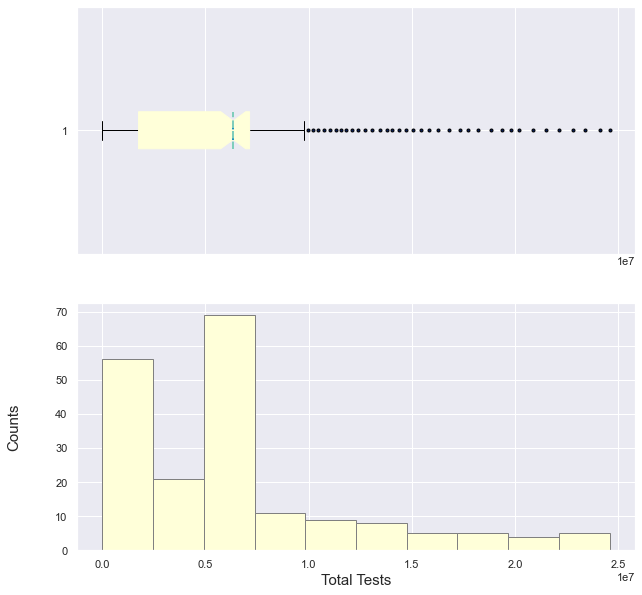

In [1385]:
total_tests = required_df["total_tests"];
x_label = "Total Tests"
y_label = "Counts"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(total_tests,vert = False,notch = True, meanline = True,showmeans = True, flierprops=outlier_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, boxprops = boxprops, patch_artist = True )
ax2.hist(total_tests,facecolor = '#ffffd9',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)

print("Consider total_tests,")
print("\t\t Minimum Value :",total_tests.min())
print("\t\t Maximum Value :",total_tests.max())
print("\t\t Mean          :",round(total_tests.mean(),2))
print("\t\t Median        :",total_tests.median())

Follows the same nature of the New Tests graph which makes sense as afterall totals tests are directly related to the tests on each day.

Consider new_tests_smoothed_per_thousand,
		 Minimum Value : 0.001
		 Maximum Value : 0.45299999999999996
		 Mean          : 0.11
		 Median        : 0.1145069444444445


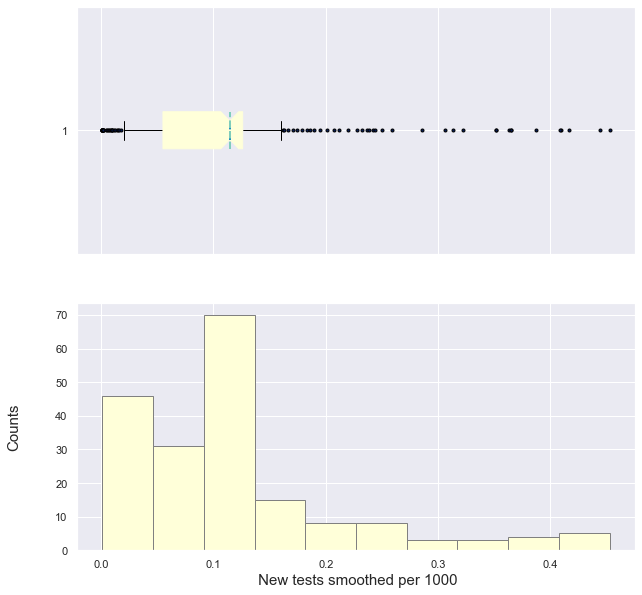

In [1386]:
new_tests_smoothed_per_thousand = required_df["new_tests_smoothed_per_thousand"];
x_label = " New tests smoothed per 1000"
y_label = "Counts"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(new_tests_smoothed_per_thousand,vert = False,notch = True, meanline = True,showmeans = True, flierprops=outlier_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, boxprops = boxprops, patch_artist = True )
ax2.hist(new_tests_smoothed_per_thousand,facecolor = '#ffffd9',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)

print("Consider new_tests_smoothed_per_thousand,")
print("\t\t Minimum Value :",new_tests_smoothed_per_thousand.min())
print("\t\t Maximum Value :",new_tests_smoothed_per_thousand.max())
print("\t\t Mean          :",round(new_tests_smoothed_per_thousand.mean(),2))
print("\t\t Median        :",new_tests_smoothed_per_thousand.median())

Consider new_tests_smoothed,
		 Minimum Value : 1121.0
		 Maximum Value : 625814.0
		 Mean          : 158027.73
		 Median        : 158027.72916666666


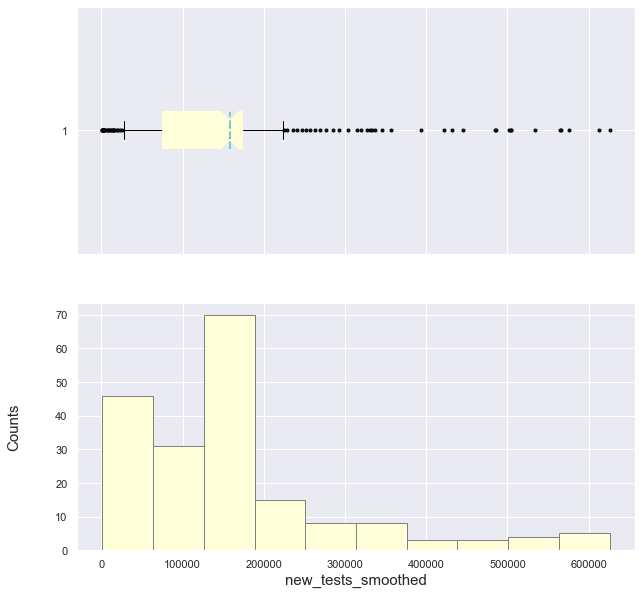

In [1387]:
new_tests_smoothed = required_df["new_tests_smoothed"];
x_label = "new_tests_smoothed"
y_label = "Counts"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(new_tests_smoothed,vert = False,notch = True, meanline = True,showmeans = True, flierprops=outlier_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, boxprops = boxprops, patch_artist = True )
ax2.hist(new_tests_smoothed,facecolor = '#ffffd9',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)

print("Consider new_tests_smoothed,")
print("\t\t Minimum Value :",new_tests_smoothed.min())
print("\t\t Maximum Value :",new_tests_smoothed.max())
print("\t\t Mean          :",round(new_tests_smoothed.mean(),2))
print("\t\t Median        :",new_tests_smoothed.median())

Consider tests_per_case,
		 Minimum Value : 8.101
		 Maximum Value : 67.888
		 Mean          : 18.03
		 Median        : 18.03


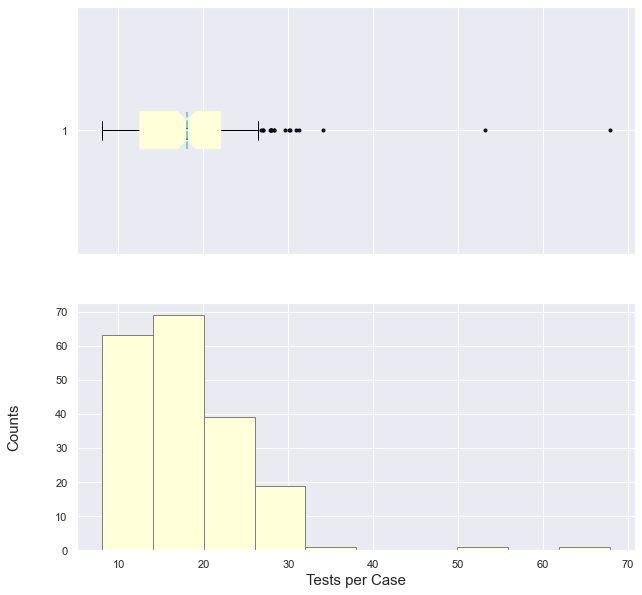

In [1388]:
tests_per_case = required_df["tests_per_case"];
x_label = "Tests per Case"
y_label = "Counts"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(tests_per_case,vert = False,notch = True, meanline = True,showmeans = True, flierprops=outlier_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, boxprops = boxprops, patch_artist = True )
ax2.hist(tests_per_case,facecolor = '#ffffd9',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)

print("Consider tests_per_case,")
print("\t\t Minimum Value :",tests_per_case.min())
print("\t\t Maximum Value :",tests_per_case.max())
print("\t\t Mean          :",round(tests_per_case.mean(),2))
print("\t\t Median        :",round(tests_per_case.median(),2))

At an average, there were atleast 18 tests conducted per Covid positive patient.

Consider positive_rate,
		 Minimum Value : 0.015
		 Maximum Value : 0.123
		 Mean          : 0.07
		 Median        : 0.07


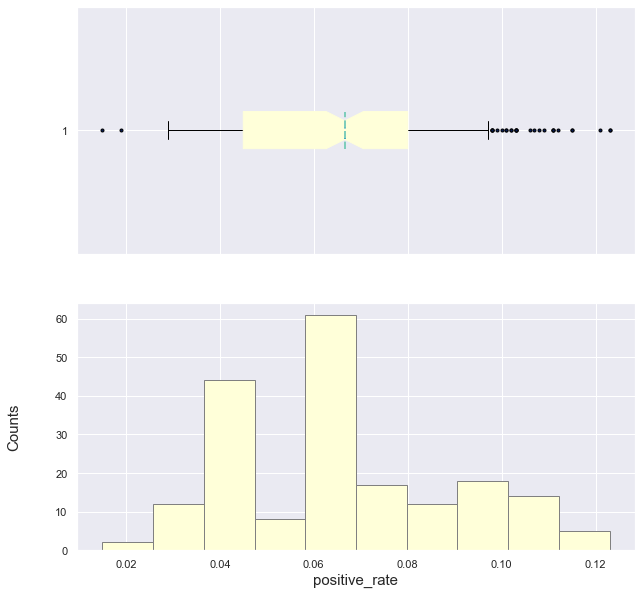

In [1389]:
positive_rate = required_df["positive_rate"];
x_label = "positive_rate"
y_label = "Counts"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(positive_rate,vert = False,notch = True, meanline = True,showmeans = True, flierprops=outlier_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, boxprops = boxprops, patch_artist = True )
ax2.hist(positive_rate,facecolor = '#ffffd9',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)

print("Consider positive_rate,")
print("\t\t Minimum Value :",positive_rate.min())
print("\t\t Maximum Value :",positive_rate.max())
print("\t\t Mean          :",round(positive_rate.mean(),2))
print("\t\t Median        :",round(positive_rate.median(),2))

Positive rate, i.e, the ratio of covid +ve patients to total no. of new tests ranges from 0.015 to 0.123.

Consider stringency_index,
		 Minimum Value : 10.19
		 Maximum Value : 100.0
		 Mean          : 66.91
		 Median        : 77.78


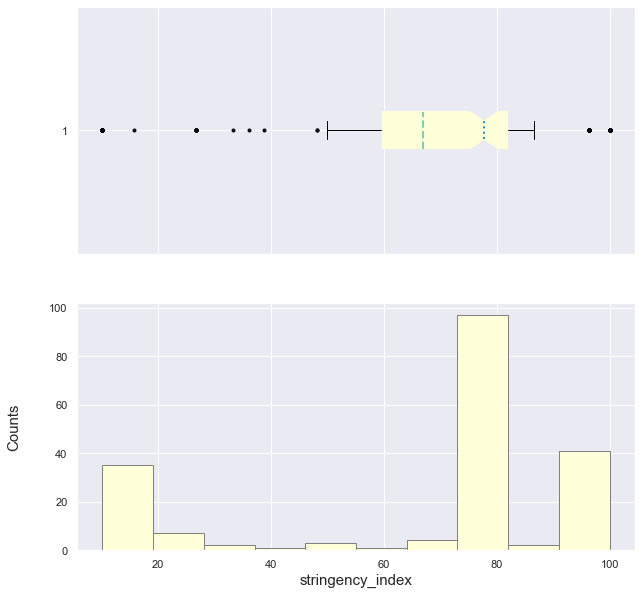

In [1390]:
stringency_index = required_df["stringency_index"];
x_label = "stringency_index"
y_label = "Counts"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(stringency_index,vert = False,notch = True, meanline = True,showmeans = True, flierprops=outlier_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, boxprops = boxprops, patch_artist = True )
ax2.hist(stringency_index,facecolor = '#ffffd9',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)

print("Consider stringency_index,")
print("\t\t Minimum Value :",stringency_index.min())
print("\t\t Maximum Value :",stringency_index.max())
print("\t\t Mean          :",round(stringency_index.mean(),2))
print("\t\t Median        :",stringency_index.median())

<p> The <b>Stringency Index</b> provides a computable parameter to evaluate the <b>effectiveness of the nationwide lockdown </b>. For a majority of days, the score on this index has been <b> above 70 </b> indicating that India has taken strict measures to contain the virus.  </p>

Consider Life Expectancy,
		 Minimum Value : 69.66
		 Maximum Value : 69.66
		 Mean          : 69.66
		 Median        : 69.66


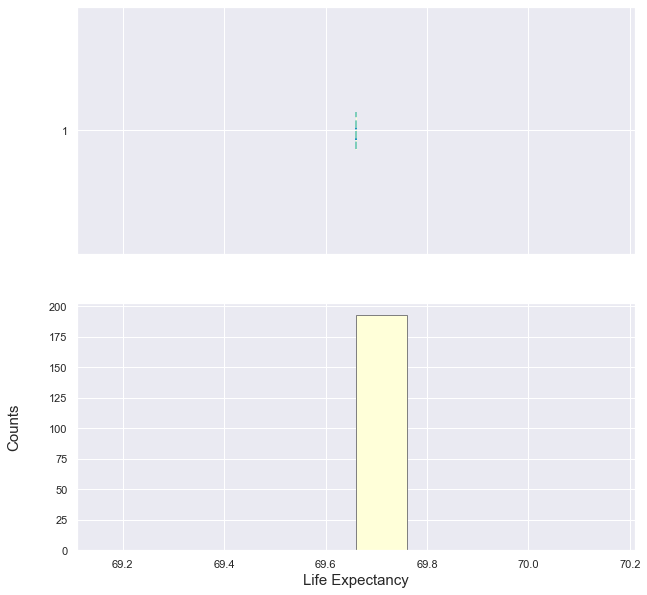

In [1391]:
stringency_index = required_df["life_expectancy"];
x_label = "Life Expectancy"
y_label = "Counts"
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
ax1.boxplot(stringency_index,vert = False,notch = True, meanline = True,showmeans = True, flierprops=outlier_circle,whis=0.5,meanprops = meanlineprops, 
            medianprops =medianprops, boxprops = boxprops, patch_artist = True )
ax2.hist(stringency_index,facecolor = '#ffffd9',edgecolor = "gray")
ax2.set_ylabel(y_label, fontsize = 15)
ax2.set_xlabel(x_label, fontsize = 15)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.setp(ax1.get_xticklabels(),visible=False)

print("Consider Life Expectancy,")
print("\t\t Minimum Value :",stringency_index.min())
print("\t\t Maximum Value :",stringency_index.max())
print("\t\t Mean          :",round(stringency_index.mean(),2))
print("\t\t Median        :",stringency_index.median())

Life Expectancy in India stands unaffected as of now. It is 69 years and 7 months.

## Bivariate Analysis

### Date vs Total Cases

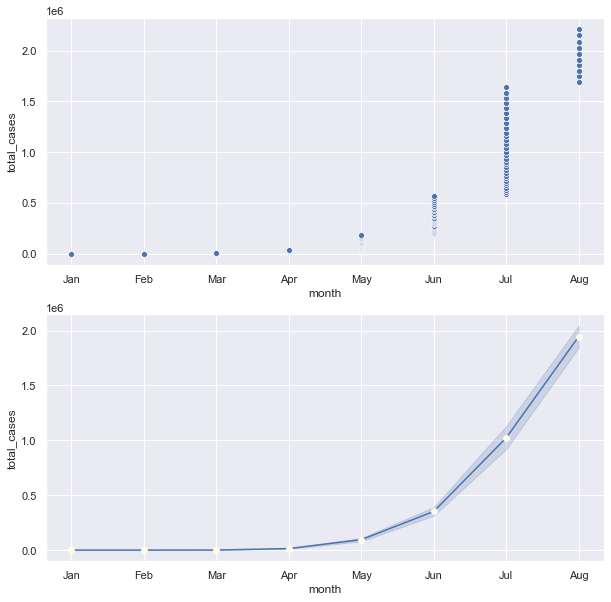

In [1392]:
required_df["date"]= pd.to_datetime(required_df["date"])
required_df["month"] = required_df["date"].dt.strftime("%b")
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.scatterplot('month','total_cases', data = required_df, ax = ax1)
sns.lineplot('month','total_cases', data = required_df, ax = ax2, sort = False, marker='o',markerfacecolor='#ffffd9')

The greatest increase in the number of covid cases has been observed in <b>July</b>.

### Total Cases vs Positive Rate

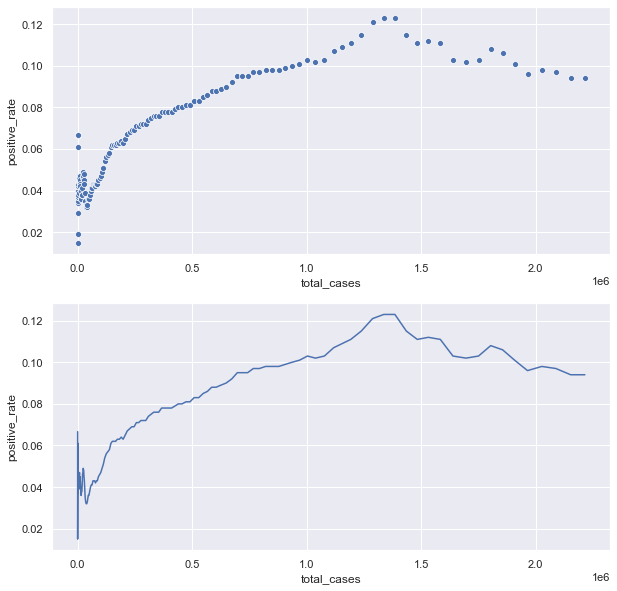

In [1393]:
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.scatterplot('total_cases','positive_rate', data = required_df, ax = ax1)
sns.lineplot('total_cases','positive_rate', data = required_df, ax = ax2,sort = False)

The positive rate reached a maximum value between 1,30,000 and 1,50,000 total cases and ever since, it has dropped.

### Total Cases vs Stringency Index

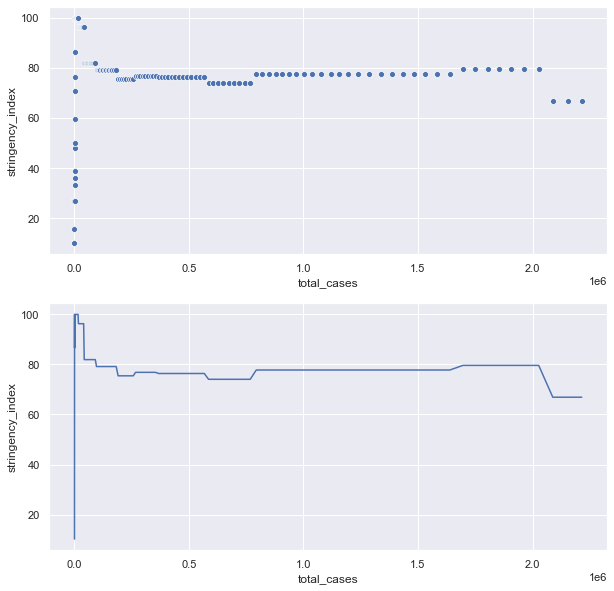

In [1394]:
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.scatterplot('total_cases','stringency_index', data = required_df, ax = ax1)
sns.lineplot('total_cases','stringency_index', data = required_df, ax = ax2, sort = False)

The stringency index in India has fairly been above 60. We can observe that India took strict measures to contain the vairus since the very beginning itself.

### Total Cases vs Tests per Case

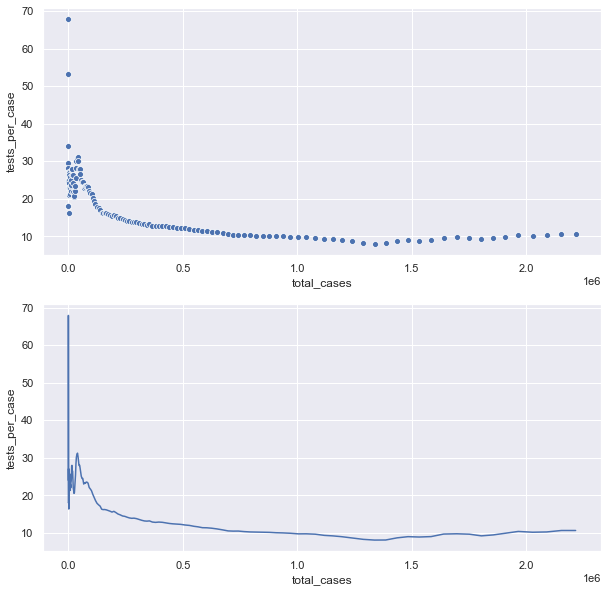

In [1395]:
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.scatterplot('total_cases','tests_per_case', data = required_df, ax = ax1)
sns.lineplot('total_cases','tests_per_case', data = required_df, ax = ax2, sort = False)

We can clearly say that the testing rate was much slower than the rate at which the Covid cases were increasing. 

### Total Cases vs Total Deaths Per Million

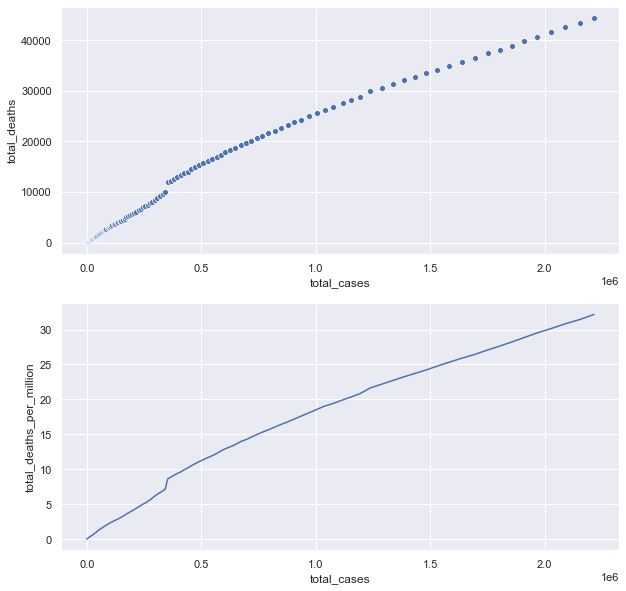

In [1396]:
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.scatterplot('total_cases','total_deaths', data = required_df, ax = ax1)
sns.lineplot('total_cases','total_deaths_per_million', data = required_df, ax = ax2,)

As the number of cases kept increasing, many people lost their lives to this virus. With 2,00,000 cases, there were alomost 40,000 deaths recorded.

### Total Cases vs New Deaths Per Million

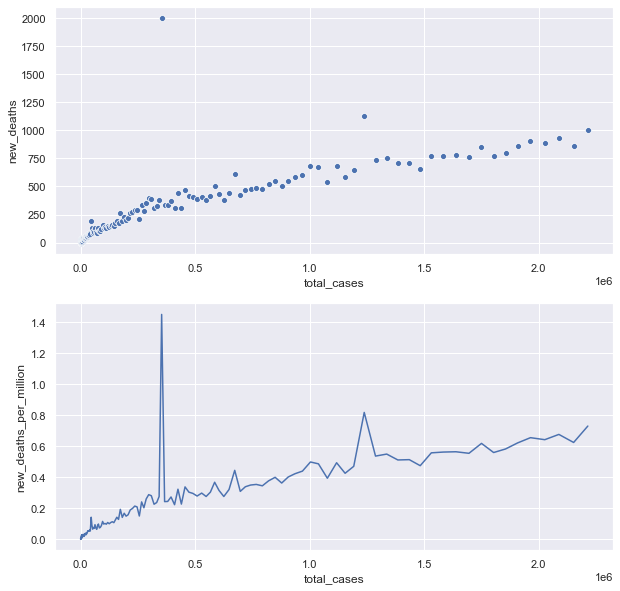

In [1397]:
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.scatterplot('total_cases','new_deaths', data = required_df, ax = ax1)
sns.lineplot('total_cases','new_deaths_per_million', data = required_df, ax = ax2,)

### Total Cases vs New Tests

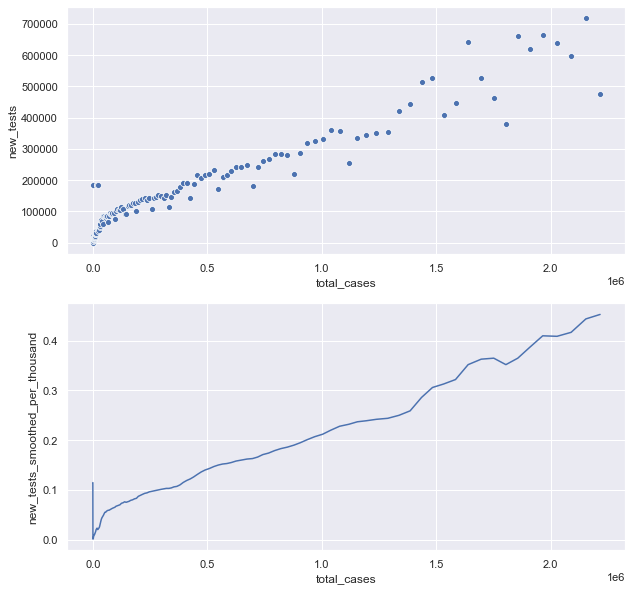

In [1398]:
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.scatterplot('total_cases','new_tests', data = required_df, ax = ax1)
sns.lineplot('total_cases','new_tests_smoothed_per_thousand', data = required_df, ax = ax2)

<ul>
<li>Abnormality observed in the beginning is because we've replaced the nans in the columns with their corresponding means.</li>
<li> This relation is fairly linear in nature.</li>
</ul>    

### Total Cases vs Total tests

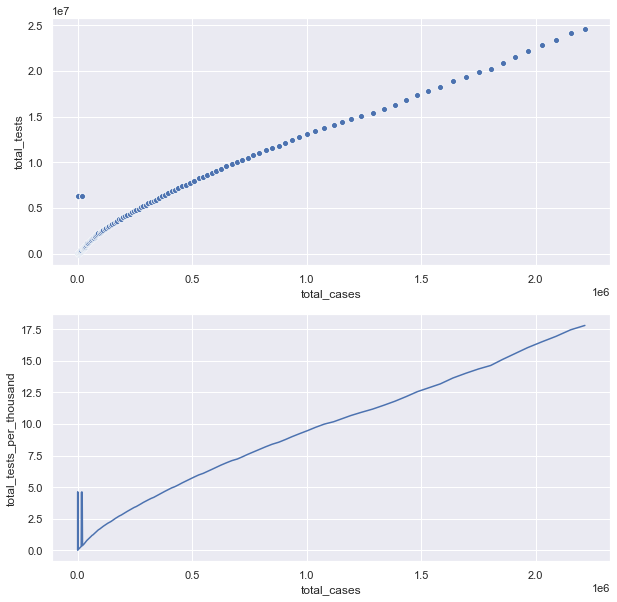

In [1399]:
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.scatterplot('total_cases','total_tests', data = required_df, ax = ax1)
sns.lineplot('total_cases','total_tests_per_thousand', data = required_df, ax = ax2,)

<ul>
    <li>Abnormality observed in the beginning is because we've replaced the nans in the columns with their corresponding means.</li>
     <li> This is relation is linear in nature. </li>
</ul>

### Total Cases vs New Cases

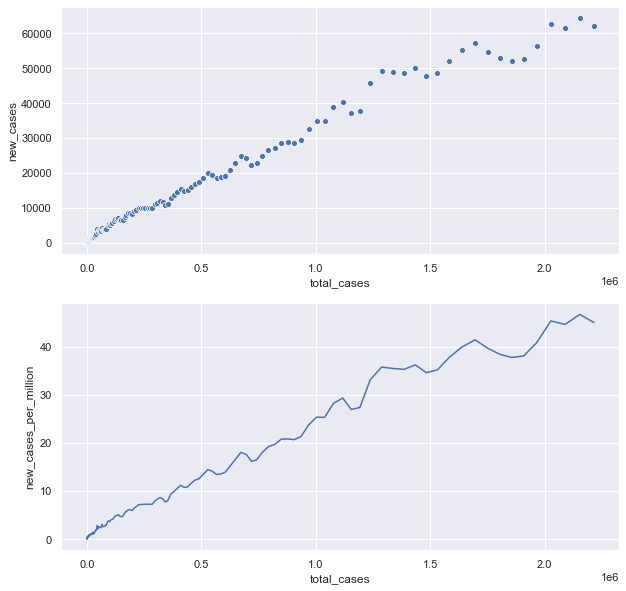

In [1400]:
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.scatterplot('total_cases','new_cases', data = required_df, ax = ax1)
sns.lineplot('total_cases','new_cases_per_million', data = required_df, ax = ax2,)

We can observe a linear relation between Total Cases and New Cases. Although this curve isn't smoothed.

### Total Cases vs GDP  Per Capita

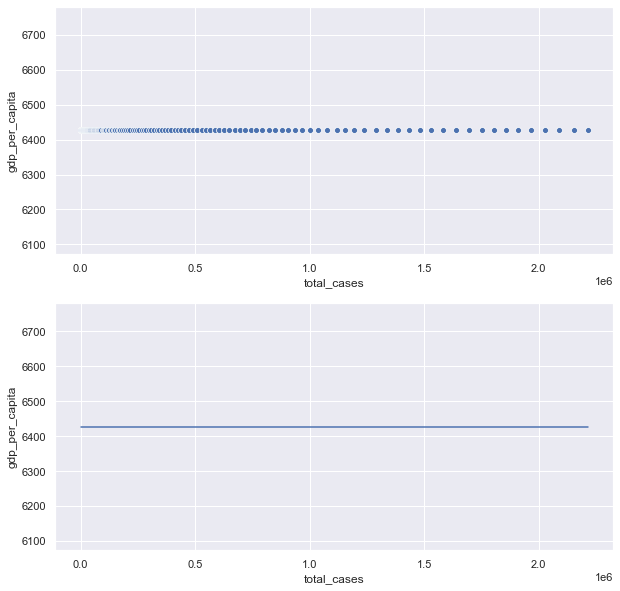

In [1401]:
plt.figure(figsize=(10,10),facecolor="w")
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.scatterplot('total_cases','gdp_per_capita', data = required_df, ax = ax1)
sns.lineplot('total_cases','gdp_per_capita', data = required_df, ax = ax2,)

According to this data, our GDP per Capita has been unaffected by the rise of Covid - 19 cases. 

## Modelling 

### Dropping unnecessary columns

In [1402]:
required_df = required_df.drop(columns = ['total_cases_per_million','gdp_per_capita','life_expectancy','new_cases','total_deaths','new_deaths','new_tests','total_tests','new_tests_per_thousand','new_tests_smoothed','month'])
required_df

,date,total_cases,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests_per_thousand,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index
15427,2020-01-30,1.0,0.001,0.000,0.000,4.598374,0.114507,18.032347,0.066611,10.190000
15428,2020-01-31,1.0,0.000,0.000,0.000,4.598374,0.114507,18.032347,0.066611,10.190000
15429,2020-02-01,1.0,0.000,0.000,0.000,4.598374,0.114507,18.032347,0.066611,10.190000
15430,2020-02-02,2.0,0.001,0.000,0.000,4.598374,0.114507,18.032347,0.066611,10.190000
15431,2020-02-03,2.0,0.000,0.000,0.000,4.598374,0.114507,18.032347,0.066611,10.190000
...,...,...,...,...,...,...,...,...,...,...
15615,2020-08-06,1964536.0,40.784,29.492,0.655,16.050000,0.410000,10.398000,0.096000,79.630000
15616,2020-08-07,2027074.0,45.317,30.134,0.642,16.513000,0.409000,10.189000,0.098000,79.630000
15617,2020-08-08,2088611.0,44.592,30.810,0.676,16.947000,0.417000,10.261000,0.097000,66.906316
15618,2020-08-09,2153010.0,46.666,31.434,0.624,17.468000,0.444000,10.651000,0.094000,66.906316


### Converting date to ordinal

In [1403]:
required_df["date"] = required_df["date"].map(dt.datetime.toordinal)
required_df

,date,total_cases,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests_per_thousand,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index
15427,737454,1.0,0.001,0.000,0.000,4.598374,0.114507,18.032347,0.066611,10.190000
15428,737455,1.0,0.000,0.000,0.000,4.598374,0.114507,18.032347,0.066611,10.190000
15429,737456,1.0,0.000,0.000,0.000,4.598374,0.114507,18.032347,0.066611,10.190000
15430,737457,2.0,0.001,0.000,0.000,4.598374,0.114507,18.032347,0.066611,10.190000
15431,737458,2.0,0.000,0.000,0.000,4.598374,0.114507,18.032347,0.066611,10.190000
...,...,...,...,...,...,...,...,...,...,...
15615,737643,1964536.0,40.784,29.492,0.655,16.050000,0.410000,10.398000,0.096000,79.630000
15616,737644,2027074.0,45.317,30.134,0.642,16.513000,0.409000,10.189000,0.098000,79.630000
15617,737645,2088611.0,44.592,30.810,0.676,16.947000,0.417000,10.261000,0.097000,66.906316
15618,737646,2153010.0,46.666,31.434,0.624,17.468000,0.444000,10.651000,0.094000,66.906316


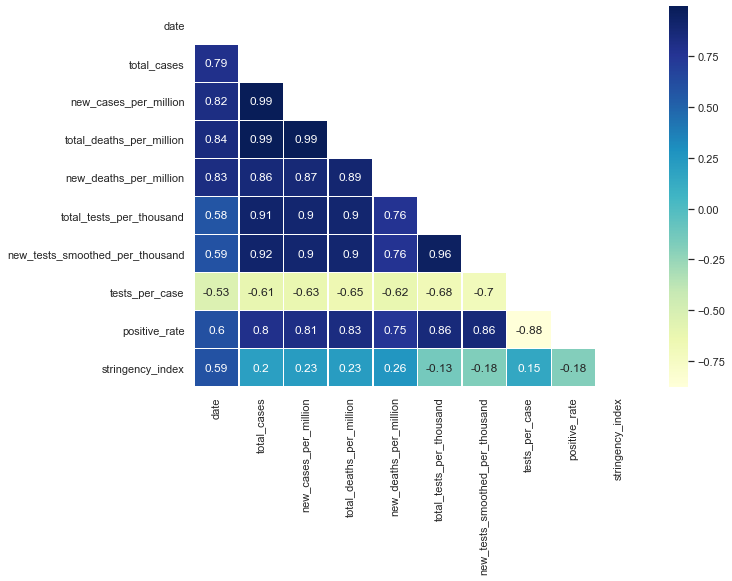

In [1404]:
correlation = required_df.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 7))
    ax = sns.heatmap(correlation, mask=mask,linewidths = 0.5, annot = True, cmap="YlGnBu")

## Split into test and train

In [1405]:
required_df.columns

Index(['date', 'total_cases', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'total_tests_per_thousand', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'stringency_index'],
      dtype='object')

In [1406]:
y = np.asarray(required_df.loc[:,'total_cases'])
required_df.drop(columns = 'total_cases', inplace = True)

In [1407]:
X = np.asarray(required_df.loc[:])

In [1408]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [1409]:
X_train, X_test, y_train, y_test = train_test_split( X, y,random_state=42)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (144, 9) (144,)
Test set: (49, 9) (49,)


### Linear Regression

In [1410]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [1411]:
print("The coefficient for linear regression is ",reg.intercept_) 

The coefficient for linear regression is  337354.60621767316


In [1412]:
reg.coef_

array([-77265.41579984, 173825.35244002, 308021.4752611 ,    850.15649773,
        12576.44488934, 153029.34215321,  -8335.25732422, -61406.17744648,
        63406.1586567 ])

In [1413]:
predicted_y = reg.predict(X_test)
print(predicted_y)

[ 3.58421391e+04  2.94673809e+05  8.14284062e+03  4.60662949e+05
  1.23901768e+05  5.97219246e+05  1.27836126e+02 -4.01185755e+03
 -1.25206177e+03  8.40722349e+03  2.53929430e+04  1.15358910e+05
 -1.34173419e+04 -8.39184605e+03  6.44551691e+05 -2.05706323e+04
  5.15686679e+05  3.03633639e+03  1.13117939e+05 -9.37903908e+03
  7.02716715e+05  2.92440419e+05  1.30536664e+05  7.19882352e+04
 -1.07759635e+04  1.33015810e+05 -1.22912449e+04  7.27369579e+05
  1.34494086e+04  4.42044299e+05  1.27111068e+05  9.83097244e+05
 -5.39175545e+03  4.93692602e+04  1.15090314e+06  1.39410240e+04
  6.75159209e+05  4.48984339e+05  9.27549349e+05  2.62049637e+04
  1.07269386e+05  8.60988029e+05  7.17772488e+03  2.92834674e+05
 -4.81673718e+03  1.77400043e+06  8.58613246e+04  1.70079228e+04
  5.96903207e+03]


In [1414]:
r2_lr = metrics.r2_score(y_test, predicted_y)*100
mse_lr = metrics.mean_squared_error(y_test, predicted_y)
rmse_lr = np.sqrt(mse_lr)
scores = [['R2 Score', r2_lr],
         ['Mean Squared Error', mse_lr],
         ['Root Mean Squared Error', rmse_lr]]
df = pd.DataFrame(scores, columns=['Metrics', 'Score'])
df

,Metrics,Score
0,R2 Score,9.965637e+01
1,Mean Squared Error,4.758662e+08
2,Root Mean Squared Error,2.181436e+04


### Random Forest Regression

In [1415]:
rfg = RandomForestRegressor()

In [1416]:
rfg.fit(X,y)

RandomForestRegressor()

In [1417]:
predicted_y_rfg = rfg.predict(X_test)

In [1418]:
r2_rfr = metrics.r2_score(y_test, predicted_y_rfg)*100
mse_rfr = metrics.mean_squared_error(y_test, predicted_y_rfg)
rmse_rfr = np.sqrt(mse_lr)
scores = [['R2 Score', r2_rfr],
         ['Mean Squared Error', mse_rfr],
         ['Root Mean Squared Error', rmse_rfr]]
df_rfg = pd.DataFrame(scores, columns=['Metrics', 'Score'])
df_rfg

,Metrics,Score
0,R2 Score,9.999692e+01
1,Mean Squared Error,4.260427e+06
2,Root Mean Squared Error,2.181436e+04


In [1419]:
models = [['Linear Regression', r2_lr, mse_lr, rmse_lr], 
          ['Random Forest Regression', r2_rfr, mse_rfr, rmse_rfr]]
df = pd.DataFrame(models, columns=['Model', 'R2_Score', 'MSE', 'RMSE'])
df

,Model,R2_Score,MSE,RMSE
0,Linear Regression,99.656366,4.758662e+08,21814.357551
1,Random Forest Regression,99.996923,4.260427e+06,21814.357551


### Prediction

In [1433]:
required_df.loc['test'] = required_df.iloc[0,-1]

In [1434]:
required_df.at['test','date'] = date.today().toordinal()

In [1435]:
test = np.asarray(required_df.loc['test']).reshape(1,-1)

In [1436]:
prediction_rfg = rfg.predict(test)
prediction_rfg

array([1991347.29])